In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
col=['Ti', 'Nb', 'Zr', 'Sn', 'Mo', 'Ta']
x=pd.read_excel("../../data/wholedata0731_dropsame.xlsx")[col].values
y=pd.read_excel("../../data/wholedata0731_dropsame.xlsx")["stability"].values


In [3]:
pd.read_excel("../../data/wholedata0731_dropsame.xlsx")["E (Gpa)"].dropna()

0      54.0
1      52.0
114    72.8
115    67.1
116    71.9
       ... 
288    64.2
289    64.5
290    66.5
291    70.0
292    70.5
Name: E (Gpa), Length: 177, dtype: float64

In [4]:
def eoa(t1):
    ea=np.array([4,5,4,4,6,5]).astype("float")
    mass=np.array([47.867,92.906,91.224,118.711,95.95,180.948])
    return  np.sum((t1/mass)/np.sum(t1/mass)*ea)
ans=np.empty([y.shape[0]])
for i in range(x.shape[0]):
    ans[i]=eoa(x[i])

fpr,tpr,thres=roc_curve(y,ans)
np.save("eoa.npy",[fpr,tpr,thres])
print(np.sum((ans>4.2).astype("int")==y)/len(y))
output=[]
output.append(confusion_matrix(y, (ans>4.2).astype("int")).ravel())

0.6484641638225256


In [5]:
Mo_param=np.array([0,0.28,0.47,0.3,1,0.22])
ans=np.matmul(x,Mo_param.reshape(-1,1)).reshape(-1)
fpr,tpr,thres=roc_curve(y,ans)
np.save("Moeq.npy",[fpr,tpr,thres])
np.sum((ans>11.8)==y)/len(y)
output.append(confusion_matrix(y, (ans>11.8).astype("int")).ravel())

In [6]:
import torch,os
ans=[]
path="../Ms_class/model"
for i,ele in enumerate(sorted(os.listdir(path))):
    if ".pkl" in ele:
        #print(ele)
        s_min,best_lr,best_a,best_ep,act,mean,std,net=torch.load("../Ms_class/model/%s"%(ele))
        #param.append([s_min,best_lr,best_a,best_ep,str(act)])
        x_ = x.copy()
        #x_ =  np.array([[50,12,8,12,0,18]]).astype("float")
        for i in range(x_.shape[0]):
            for j in range(x_.shape[1]):
                if not std[j] == 0 :
                    x_[i][j] = (x_[i][j]- mean[j]) / std[j]
        x_ = torch.tensor(x_).float()
        ans.append((net(x_)).detach().numpy().tolist())
ans=np.array(ans)[:5,:]

In [7]:
#ans=(np.mean(np.array(ans)[:5,:],axis=0)).reshape(-1)
ans=(np.sum(ans>0.5,axis=0).reshape(-1)>2).astype("int")

In [8]:
output.append(confusion_matrix(y, (ans>0.5).astype("int")).ravel())

In [9]:
np.save("Ms_class.npy",output)

In [10]:
np.load("Ms_class.npy")

array([[ 59,  30,  73, 131],
       [ 56,  33,  54, 150],
       [ 77,  12,   5, 199]], dtype=int64)

In [11]:
fpr,tpr,thres=roc_curve(y,ans)
np.save("Msnn.npy",[fpr,tpr,thres])

In [12]:
ref=pd.read_excel("../../data/wholedata0731_dropsame.xlsx").iloc[:,-1].values


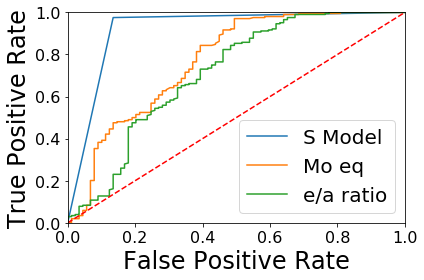

In [13]:
fpr,tpr,thres=np.load("Msnn.npy")
p1,=plt.plot(fpr,tpr)
fpr,tpr,thres=np.load("Moeq.npy")
p2,=plt.plot(fpr,tpr)
fpr,tpr,thres=np.load("eoa.npy")
p3,=plt.plot(fpr,tpr)
np.arange
plt.plot(fpr,fpr,'r--')
plt.legend([p1,p2,p3],["S Model","Mo eq","e/a ratio"],fontsize=20)
plt.xlabel("False Positive Rate",fontsize=24)
plt.ylabel("True Positive Rate",fontsize=24)
plt.tick_params(labelsize=16)
plt.xlim(0,1)
plt.ylim(0,1)
plt.tight_layout()
plt.savefig("ROC.png",dpi=800)

In [15]:
output

[array([ 59,  30,  73, 131], dtype=int64),
 array([ 56,  33,  54, 150], dtype=int64),
 array([ 77,  12,   5, 199], dtype=int64)]